# OSEMN Exercises

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

1\. Create a random list of number and then save it to a text file named "simple_data.txt"

In [3]:
from numpy.random import rand

In [8]:
N=20
x=rand(N,)

with open("simple_data.txt","w") as fh :
    for i in x :
        fh.write(str(i)+"\n")
#fh.close() #non serve se usi with as ma è buona norma se fai solo fh=open()


2\. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [16]:
N=5
N_cols=N
N_rows=N
x=rand(N_rows,N_cols)
print(x)

with open("data.txt","w") as fh :
    for i in range(N_rows) : #seleziono una riga
        for j in range(N_cols) : #scorro fra le colonne di quella riga
            fh.write(str(x[i,j])+" ")
        fh.write("\n")


[[0.55988033 0.57765628 0.75580418 0.46949555 0.9880604 ]
 [0.90405458 0.51192511 0.80816379 0.73300547 0.63039238]
 [0.78756327 0.6943585  0.84592301 0.43447991 0.00428866]
 [0.76129393 0.13685913 0.91744045 0.43141171 0.95319731]
 [0.28245033 0.10121212 0.22746594 0.1446265  0.05751059]]


3\. Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [17]:
import csv

#o formatto un'unica stringa che visualmente riproduce il csv finale o scrivo direttamente ad esempio le righe della matrice nel csv. Questo secondo metodo probabilmente è più efficiente perché processo una riga alla volta anziché salvare in memoria matrice e (pezzi del)la stringa finale

#Metodo 1:
M=np.loadtxt("data.txt")
N_rows,N_cols = M.shape
s=list()

for i in range(N_rows) :
    for j in range(N_cols) :
        s.append(str(M[i,j])+",")
    s.append("\n")

s="".join(s)
#print(s)
#print(type(s))

with open("data1.csv","w") as fh :
    fh.write(s)

#Metodo 2:
with open("data.txt","r") as fh_txt :
    with open("data2.csv","w",newline="") as fh_csv : #elimino le newlines che altrimenti compaiono nel csv! cfr : https://stackoverflow.com/questions/3191528/csv-in-python-adding-an-extra-carriage-return-on-windows e https://docs.python.org/3/library/functions.html#open-newline-parameter
        file_csv = csv.writer(fh_csv,delimiter=",")
        for row in fh_txt :
            #row = row.rstrip() #per eliminare il newline finale che prima mi serviva. #non serve questa riga se disabiliti la traduzione di newline come detto sopra
            file_csv.writerow(row.split())#qui vuole una lista di stringhe, se no scrive su file carattere per carattere
            #print(row)
            

4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line corresponds to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [46]:
#Non capisco come si debba interpretare questo file binario!! 
file = open("credit_card.dat","rb").readlines() # .read() funziona come al solito e cioè mi dà tutto il file in un'unica stringa (binario in questo caso), .readlines() invece mi dà una lista delle stringhe (numeri in binario in questo caso) corrispondenti a ciascuna riga lasciando "\n" alla fine di ogni elemento della lista
char_size=6
n_char=16 #un numero di carta di credito è composto da 4*4=16 cifre
pad_size=4
line_size=n_char*char_size
l=len(file)
#voglio analizzare il file riga per riga (uso readlines). Gli ultimi 4 bits vanno scartati; si può semplicemente scartare ogni riga composta solo da 4 bits

for i,line in enumerate(file) :
    line = line.strip() #elimino \n
    num_characters = int((len(line)-pad_size)/char_size) #il risultato di una divisione è sempre un float. Elimino il padding
    if num_characters > 0 :
        credit_card_number = ""
        for char_n in range(num_characters) :
            credit_card_number += chr(int(line[char_n*char_size:(char_n+1)*char_size],2))#interpreto ogni numero come binario, lo converto in base decimale e ottengo il carattere ascii corrispondente a quel valore
    print("Credit card number %d:"%i,credit_card_number)

#fh.close() #non penso serva se uso .read()

Credit card number 0: 7648 5673 3775 2271
Credit card number 1: 3257 8247 3354 2266
Credit card number 2: 2722 0001 4011 6652
Credit card number 3: 0661 3063 3742 3150
Credit card number 4: 0432 1608 1462 4742
Credit card number 5: 5827 2027 8785 7303
Credit card number 6: 5774 8528 2087 1117
Credit card number 7: 8140 1210 6352 2845
Credit card number 8: 5764 1133 7301 7100
Credit card number 9: 6456 1737 4126 6726
Credit card number 10: 1228 8631 7382 0000
Credit card number 11: 7051 0160 5374 3166
Credit card number 12: 0618 3587 1630 6376
Credit card number 13: 1545 5454 7444 5636
Credit card number 14: 6735 3116 3202 6834
Credit card number 15: 7287 5011 1547 8413
Credit card number 16: 7033 2607 3328 4200
Credit card number 17: 2568 5244 1874 5024
Credit card number 18: 1684 2253 7570 7118
Credit card number 19: 0672 2576 0575 6631
Credit card number 20: 6332 8353 8787 1340
Credit card number 21: 1813 3361 1175 4211
Credit card number 22: 2477 6450 8840 2368
Credit card number 23

5\. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.

In [118]:
import json as js 
import csv

with open("user_data.json","r") as fh :
    user_data=js.load(fh)#lista di dizionari
    l=len(user_data)
    #un metodo semplice è quella di esaminare manualmente il valore che in ogni dizionario è associato alla chiave CreditCardType
    with open("american_express.csv","w",newline="") as fh_csv :
        file_csv = csv.writer(fh_csv,delimiter=",")
        file_csv.writerow(diz.keys())#come prima riga metto le chiavi (uguali per tutti), e poi i valori
        for diz in user_data :
            if diz["CreditCardType"] == "American Express" :
                file_csv.writerow(diz.values())

    #posso anche usare il seguente metodo alternativo sfruttando il fatto che ho una lista di dizionari
    #cfr https://realpython.com/python-csv/
    with open("american_express2.csv","w",newline="") as fh_csv :
        file_csv = csv.DictWriter(fh_csv,delimiter=",",fieldnames=user_data[0].keys()) #le chiavi sono uguali per tutti i dizionari
        file_csv.writeheader() #innanzitutto metto i field names analogamente a prima
        for diz in user_data :
            if diz["CreditCardType"] == "American Express" :
                file_csv.writerow(diz)
    

6\. Load the file from this url: [https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1](https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1) with Pandas. 
+ Explore the data (see the info of the data)
+ Draw the istogram of the 'class' field. Decribe wath yuou see


Retrieving mushrooms_categorized.csv from https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1 



,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8004,1,2,2,4,0,2,1,0,1,0,...,1,7,6,0,2,1,0,7,4,4
8005,1,5,3,2,0,7,1,0,1,0,...,2,7,6,0,2,1,0,7,4,0
8006,1,3,3,2,0,8,1,0,1,0,...,1,7,6,0,2,1,0,7,4,4
8007,1,3,2,2,0,2,1,0,1,0,...,1,6,7,0,2,1,0,7,4,0


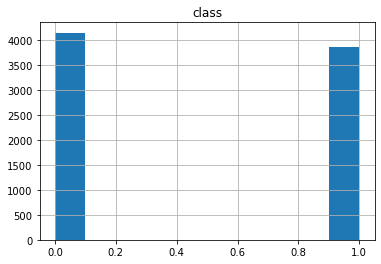

In [26]:
import urllib.request, urllib.error, urllib.parse #
import pandas as pd
import csv
import re
from IPython.display import display

url="https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1"
name=re.findall("/([^/]+csv)",url) #trova un pezzo di stringa che inizi con /, poi contenga caratteri diversi da / ([^/]) per una o più volte (+) e poi finisca con csv. Cattura solo ciò che è dentro (...). Ovviamente voglio 1 o più match di caratteri diversi da / e non zero (* anziché +) perché se no il file non ha nome!
if name != [] : 
    name=name[0]
    print("Retrieving",name,"from",url,"\n")
    #s=urllib.request.urlopen(url).read().decode()
    #print(s) #giusto per vedere se funziona, preferisco lavorare riga per riga in modo da salvare più facilmente il csv e utilizzare al tempo stesso meno memoria
    with urllib.request.urlopen(url) as fh_url : #devo aprire due file, uno in lettura e uno in scrittura-->mi servono due with
        with open(name,"w",newline="") as fh_csv :
            file_csv=csv.writer(fh_csv,delimiter=",")
            fh_txt=open(name.replace(".csv",".txt"),"w")#scrivo un file identico ma .txt ai fini di un test
            for line in fh_url :
                #NOTA: nel file scaricato i valori sono separati da virgole anziché spazi, quindi o uso quelle come separatore (non avrò "" nel csv perché le parole/i numeri saranno correttamente separati anziché interpretati come un'unica stringa=linea corrente, ma avrò i "\n") o preventivamente le rimpiazzo con degli spazi
                file_csv.writerow(line.decode().replace(","," ").split())#qui o gli dai una lista di stringhe o scrive carattere per carattere..!
                #probabilmente potrei omettere il decode e lavorare in binario (mode="wb"), ma writerow vuole le stringhe
                fh_txt.write(line.decode())
            fh_txt.close()
            data=pd.read_csv(name)
            #print(data) #funziona ma usando il modulo di ipython jupyter mostra un output più bello e "raffinato"
            display(data)
            data.hist("class")

    #data=pd.read_csv(file_csv)

else:
    print("there was an error while extracting the file name from the url!")

7\. Load the remote file [https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1](https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1) with Pandas and plot a scatter plot all possible combination of the following fields:
    
  + features_1
  + features_2
  + features_3

Retrieving regression_generated.csv from https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1 



,label,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,...,features_11,features_12,features_13,features_14,features_15,features_16,features_17,features_18,features_19,features_20
0,-89.243497,2.175170,-0.285786,-0.603396,-0.627453,-0.686474,0.381067,0.306205,-0.637447,-1.332087,...,1.290725,1.047483,-1.055467,0.853204,0.038665,-0.752959,0.577920,-0.657400,1.367308,0.570199
1,230.050125,1.481941,-1.327870,-0.543583,-0.303578,1.552964,0.549738,-0.763094,-0.455796,2.053388,...,-1.761306,-0.934284,-1.050999,0.444026,-0.037959,1.061624,-1.569870,2.410696,1.113594,2.329479
2,-286.844411,-1.154394,-0.178649,-1.636646,0.239353,-0.684994,0.587201,-0.209564,-0.428956,-0.757998,...,0.374645,-1.702189,-0.014514,-0.711557,-0.558523,-1.204526,0.234989,0.398384,-0.236555,0.642003
3,364.552862,0.197665,1.455707,1.562205,2.168207,0.053335,0.790492,-0.212023,-1.142483,-1.124906,...,0.712160,-2.844936,0.483994,-0.694294,1.349605,-1.303414,0.161987,0.754084,1.248258,-1.466045
4,515.460006,0.596676,0.969860,1.294158,-0.404728,2.145297,0.997481,-0.541670,-0.952850,-0.592084,...,-1.347072,0.243422,0.290336,0.798331,0.876428,-0.366807,-0.119534,0.892320,-0.806912,0.736080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-328.100239,-1.820929,1.358539,-2.494838,0.828299,0.199255,0.142303,-0.582563,0.472356,-1.411304,...,-1.062502,2.299985,-0.085065,0.357165,-1.400150,-0.976176,-0.796009,-0.148662,0.978054,-0.804272
1996,-62.960036,-0.883712,-0.063687,-0.418704,-0.872601,0.363769,-0.368570,-0.104321,-2.493615,-1.694770,...,-0.197659,-0.533637,-0.598431,-0.039737,1.882953,-1.837356,0.583887,0.603931,-0.356482,0.029355
1997,-90.262252,-0.021394,-0.312864,-0.730848,-1.341482,-0.720862,-0.683872,-0.805370,-0.521334,-0.074645,...,1.899276,0.417949,0.324229,0.448252,-0.282110,-2.320763,1.484126,0.392324,-1.116838,-0.459027
1998,-74.333901,-0.041909,-0.862731,-1.232011,1.268843,0.093043,1.684069,0.753851,-0.537096,-0.971790,...,1.401321,-0.933149,-0.166864,1.152448,1.605114,-1.339651,0.105628,0.676177,-0.035598,-1.329490


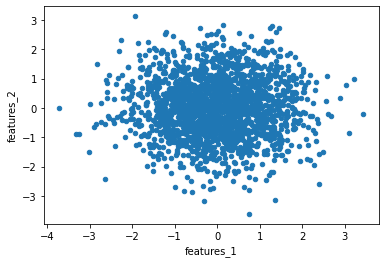

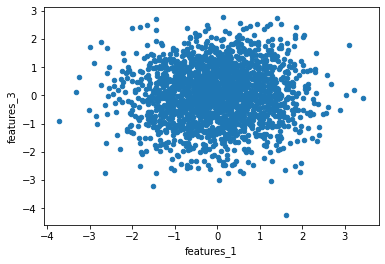

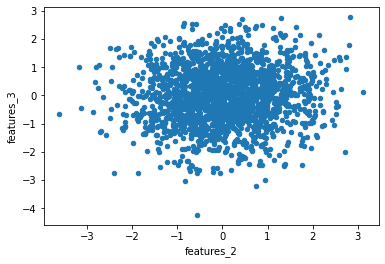

In [31]:
import urllib.request, urllib.error, urllib.parse
import re
import pandas as pd
import io
from IPython.display import display
import itertools

#tutta la cosa di estrarre il nome del file dall'url e procedere solo se il lavoretto con le regex's funziona è uguale a prima. Il modo intelligente di lavorare sarebbe probabilmente costruire un decorator funzione del "name" che fa questa estrazione, riscrivere sia l'esercizio precedente che questo come una funzione e decorarle separatamente con lo stesso decorator. Tuttavia al momento sono pigro e stanco, quindi faccio una cosa diversa sfruttando il fatto che se non devo salvare separatamente il csv senza pandas posso sfruttare pandas stesso per costruirsi da solo il csv direttamente dalla stringa; vedi in proposito https://www.kite.com/python/answers/how-to-create-a-pandas-dataframe-from-a-string-in-python
url = "https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1"
name=re.findall("/([^/]+csv)",url)
if name != [] :
    name=name[0]
    print("Retrieving",name,"from",url,"\n")
    data=pd.read_csv(io.StringIO(urllib.request.urlopen(url).read().decode()),delimiter=",")#scarico e decodifico in modo da ottenere una stringa, che "trasformo in buffer" come spiegato in quell'articolo in modo che si possa usare pd.read_csv()
    display(data)
    l=["features_1","features_2","features_3"]
    l=list(itertools.combinations(l,2)) #https://stackoverflow.com/questions/5360220/how-to-split-a-list-into-pairs-in-all-possible-ways
    for i in l :
        data.plot.scatter(*i) #unpack operator needed!

else : print("an error occurred while extracting the file name from the url")

8\. Load the same file of point 6, and convert the file to json with Pandas.

In [4]:
import urllib.request, urllib.error, urllib.parse #
import pandas as pd
import json as js
import csv
import re
import io

url="https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1"
name=re.findall("/([^/]+csv)",url)
if name != [] :
    name=name[0]
    print("Retrieving",name,"from",url,"\n")
    #data=pd.read_csv(io.StringIO(urllib.request.urlopen(url).read().decode()),delimiter=",")#vedi esercizio precedente
    data=pd.read_csv(url,delimiter=",",header=None)#alternativa più veloce!
    s=data.to_json()
    diz=js.loads(s)#carica stringa formattata e la interpreta come python dictionary, equivalente nativo del json. Una volta che si ha il dizionario questo può essere serializzato in un oggetto json vero e proprio pronto per essere scritto su file
    file_js=js.dumps(diz,indent=4)#infine il dizionario viene tradotto nel formato json vero e proprio
    with open(name.replace(".csv",".json"),"w") as fh_js :
        fh_js.write(file_js)
#NOTA: la traduzione da stringa a dizionario e poi di nuovo a stringa (json) non sembra essere superflua, passando a dumps direttamente s il file in uscita è brutto 
else :
    print("An error occurred while extracting the file name from the url")


Retrieving mushrooms_categorized.csv from https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1 

